# PyCity Schools Analysis

- The highest performing schools are all charter schools
- The highest performing schools have less students compared to the bottom five schools
- The total school budgets of highest performing schools are lower compared to the budgets of lowest performing schools.
- Overall, reading scores are higher compared to the math scores across all schools and grade levels. 
- The average scores across grade levels are consistent within each school
- Schools with smaller budgets drastically outperform schools with bigger budgets, 90% vs. 53-62%, and spending is inversely proportional to math and reading scores.
- Small and medium sized schools outperform the large sized schools
- Charter schools performed better compared to district schools.  

- Further considerations:
    Based on the given data, smaller schools, charter schools and those with smaller budgets per student seem to perform better. However, it is hard to determine causality solely on this analysis as charter schools seem to be smaller than district schools in general. Additionally, charter schools can receive additional funding through private channels that most district schools do not. Furthermore, the programs offered, staffing and the overall demographics may also contribute to the difference in performance and require further investigation.
---- 

In [60]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

In [2]:
# Calculate the total number of unique schools
school_count = school_data_complete["school_name"].unique()
len(school_count)
school_count

array(['Huang High School', 'Figueroa High School', 'Shelton High School',
       'Hernandez High School', 'Griffin High School',
       'Wilson High School', 'Cabrera High School', 'Bailey High School',
       'Holden High School', 'Pena High School', 'Wright High School',
       'Rodriguez High School', 'Johnson High School', 'Ford High School',
       'Thomas High School'], dtype=object)

In [3]:
# Calculate the total number of students
student_count = len(school_data_complete["student_name"])
student_count

39170

In [4]:
# Calculate the total budget
per_school_budget = school_data_complete.groupby(["school_name"]).mean()["budget"]
total_budget = per_school_budget.sum()
total_budget

24649428.0

In [5]:
# Calculate the average (mean) math score
average_math_score = school_data_complete[["school_name","math_score"]].mean(numeric_only=True)
average_math_score = float(average_math_score)
average_math_score

78.98537145774827

In [6]:
# Calculate the average (mean) reading score
average_reading_score = school_data_complete[["school_name","reading_score"]].mean(numeric_only=True)
average_reading_score = float(average_reading_score)
average_reading_score


81.87784018381414

In [7]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
passing_math_percentage

74.9808526933878

In [8]:
# Calculate the percentage of students who passeed reading (hint: look at how the math percentage was calculated)  
passing_reading_count = school_data_complete[(school_data_complete["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count) * 100
passing_reading_percentage

85.80546336482001

In [9]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[
    (school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)
].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate

65.17232575950983

In [10]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
raw_data = {
   'Total Schools' : [len(school_count)],
  'Total Students': [student_count],
    'Total Budget': [total_budget],
    'Average Math Score': [average_math_score],
    'Average Reading Score': [average_reading_score],
    '% Passing Math' : [passing_math_percentage],
    '% Passing Reading' : [passing_reading_percentage],
    '% Overall Passing' : [overall_passing_rate]
}

raw_data
district_summary = pd.DataFrame(raw_data, index=['0'], columns=["Total Schools", "Total Students", "Total Budget", "Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading", "% Overall Passing"])
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [11]:
# Use the code provided to select the school type
school_types = school_data.set_index("school_name")["type"]
school_types

school_name
Huang High School        District
Figueroa High School     District
Shelton High School       Charter
Hernandez High School    District
Griffin High School       Charter
Wilson High School        Charter
Cabrera High School       Charter
Bailey High School       District
Holden High School        Charter
Pena High School          Charter
Wright High School        Charter
Rodriguez High School    District
Johnson High School      District
Ford High School         District
Thomas High School        Charter
Name: type, dtype: object

In [12]:
# Calculate the total student count by school
per_school_counts = school_data_complete.groupby(["school_name"]).count()["student_name"]
per_school_counts

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: student_name, dtype: int64

In [13]:
# Calculate the total school budget and per capita spending
per_school_budget = school_data_complete.groupby(["school_name"]).mean()["budget"]
per_school_capita = per_school_budget / per_school_counts
per_school_budget


school_name
Bailey High School       3124928.0
Cabrera High School      1081356.0
Figueroa High School     1884411.0
Ford High School         1763916.0
Griffin High School       917500.0
Hernandez High School    3022020.0
Holden High School        248087.0
Huang High School        1910635.0
Johnson High School      3094650.0
Pena High School          585858.0
Rodriguez High School    2547363.0
Shelton High School      1056600.0
Thomas High School       1043130.0
Wilson High School       1319574.0
Wright High School       1049400.0
Name: budget, dtype: float64

In [14]:
# Calculate the average test scores
per_school_math = school_data_complete.groupby(["school_name"]).mean()["math_score"]
per_school_reading = school_data_complete.groupby(["school_name"]).mean()["reading_score"]
per_school_math
#per_school_reading

school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64

In [15]:
# Calculate the number of schools with math scores of 70 or higher
school_passing_math = school_data_complete[school_data_complete["math_score"] >= 70]
school_passing_math.head()
len(school_passing_math)

29370

In [16]:
# Calculate the number of schools with reading scores of 70 or higher
school_passing_reading = school_data_complete[school_data_complete["reading_score"] >= 70]
school_passing_reading.head()
len(school_passing_reading)

33610

In [17]:
# Use the provided code to calculate the schools that passed both math and reading with scores of 70 or higher
passing_math_and_reading = school_data_complete[
    (school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)
]
passing_math_and_reading.head()
len(passing_math_and_reading)

25528

In [18]:
# Use the provided code to calculate the passing rates
per_school_passing_math = school_passing_math.groupby(["school_name"]).count()["student_name"] / per_school_counts * 100
per_school_passing_reading = school_passing_reading.groupby(["school_name"]).count()["student_name"] / per_school_counts * 100
per_overall_passing_rate = passing_math_and_reading.groupby(["school_name"]).count()["student_name"] / per_school_counts * 100
per_school_passing_reading


school_name
Bailey High School       81.933280
Cabrera High School      97.039828
Figueroa High School     80.739234
Ford High School         79.299014
Griffin High School      97.138965
Hernandez High School    80.862999
Holden High School       96.252927
Huang High School        81.316421
Johnson High School      81.222432
Pena High School         95.945946
Rodriguez High School    80.220055
Shelton High School      95.854628
Thomas High School       97.308869
Wilson High School       96.539641
Wright High School       96.611111
Name: student_name, dtype: float64

In [82]:
per_school_summary_v2 = pd.DataFrame({
   'School Type' : school_types,
  'Total Students': per_school_counts,
    'Total School Budget': per_school_budget,
    'Per Student Budget': per_school_capita,
    'Average Math Score': per_school_math,
    'Average Reading Score': per_school_reading,
    '% Passing Math' : per_school_passing_math,
    '% Passing Reading' : per_school_passing_reading,
    '% Overall Passing' : per_overall_passing_rate
})

In [71]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.

per_school_summary = pd.DataFrame({
   'School Type' : school_types,
  'Total Students': per_school_counts,
    'Total School Budget': per_school_budget,
    'Per Student Budget': per_school_capita,
    'Average Math Score': per_school_math,
    'Average Reading Score': per_school_reading,
    '% Passing Math' : per_school_passing_math,
    '% Passing Reading' : per_school_passing_reading,
    '% Overall Passing' : per_overall_passing_rate
})

per_school_summary["Total Students"] = per_school_summary["Total Students"].map("{:,}".format)
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,"4,976","$3,124,928.00",628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,"1,858","$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,"2,949","$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,"2,739","$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,"1,468","$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,"4,635","$3,022,020.00",652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",581.0,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,"2,917","$1,910,635.00",655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,"4,761","$3,094,650.00",650.0,77.072464,80.966394,66.057551,81.222432,53.539172


In [20]:
per_school_summary.dtypes

School Type               object
Total Students            object
Total School Budget       object
Per Student Budget       float64
Average Math Score       float64
Average Reading Score    float64
% Passing Math           float64
% Passing Reading        float64
% Overall Passing        float64
dtype: object

## Highest-Performing Schools (by % Overall Passing)

In [21]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.

Top_schools = per_school_summary.sort_values("% Overall Passing", ascending=False)
Top_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Cabrera High School,Charter,"1,858","$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,"1,635","$1,043,130.00",638.0,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,"1,468","$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,"2,283","$1,319,574.00",578.0,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",609.0,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
Bottom_schools = per_school_summary.sort_values("% Overall Passing")
Bottom_schools.head()

## Math Scores by Grade

In [22]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by "school_name" and take the mean of each.
ninth_graders_scores = ninth_graders.groupby("school_name").mean()
tenth_graders_scores =  tenth_graders.groupby("school_name").mean()
eleventh_graders_scores =  eleventh_graders.groupby("school_name").mean()
twelfth_graders_scores =  twelfth_graders.groupby("school_name").mean()

# Use the code to select only the `math_score`.
ninth_grader_math_scores = ninth_graders_scores["math_score"]
tenth_grader_math_scores = tenth_graders_scores["math_score"]
eleventh_grader_math_scores = eleventh_graders_scores["math_score"]
twelfth_grader_math_scores = twelfth_graders_scores["math_score"]

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`

math_scores_by_grade = pd.DataFrame({
                    "9th": ninth_grader_math_scores,
                    "10th": tenth_grader_math_scores,
                    "11th": eleventh_grader_math_scores,
                    "12th": twelfth_grader_math_scores
})


# Minor data wrangling
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

In [23]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]


# Use the code to select only the `reading_score`.
ninth_grader_reading_scores = ninth_graders_scores["reading_score"]
tenth_grader_reading_scores = tenth_graders_scores["reading_score"]
eleventh_grader_reading_scores = eleventh_graders_scores["reading_score"]
twelfth_grader_reading_scores = twelfth_graders_scores["reading_score"]

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`

reading_scores_by_grade = pd.DataFrame({
                    "9th": ninth_grader_reading_scores,
                    "10th": tenth_grader_reading_scores,
                    "11th": eleventh_grader_reading_scores,
                    "12th": twelfth_grader_reading_scores
})

# Minor data wrangling
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

In [24]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
group = ["<$585", "$585-630", "$630-645", "$645-680"]

In [25]:
# Create a copy of the school summary since it has the "Per Student Budget" 
school_spending_df = per_school_summary.copy()
school_spending_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,"4,976","$3,124,928.00",628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,"1,858","$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,"2,949","$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,"2,739","$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,"1,468","$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455


In [26]:
# Use `pd.cut` to categorize spending based on the bins.
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df["Per Student Budget"],spending_bins,labels=group)
school_spending_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
school_name,,,,,,,,,,
Bailey High School,District,"4,976","$3,124,928.00",628.0,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,"1,858","$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,"2,949","$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,District,"2,739","$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,"1,468","$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630


In [27]:
#  Calculate averages for the desired columns. 
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]

In [28]:
# Assemble into DataFrame
spending_summary = pd.DataFrame({
                        "Average Math Score":spending_math_scores,
                         "Average Reading Score":spending_reading_scores,
                        "% Passing Math":spending_passing_math,
                        "% Passing Reading": spending_passing_reading,
                        "% Overall Passing": overall_passing_spending 
})

spending_summary.index.name = "Spending Ranges (Per Student)"
# Display results
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


<AxesSubplot: xlabel='Spending Ranges (Per Student)'>

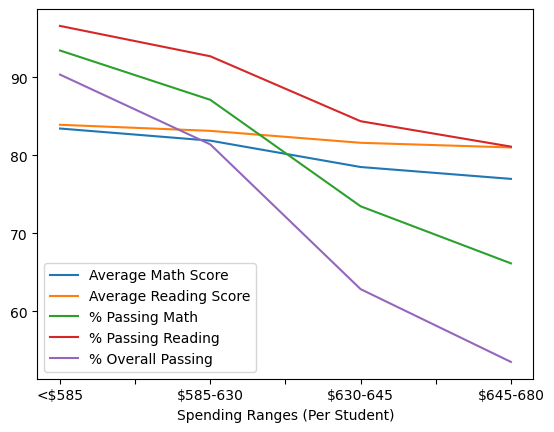

In [29]:
import matplotlib.pyplot as plt
spending_summary.plot()

## Scores by School Size

In [72]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
groups = ["Small (< 1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [78]:
per_school_summaryb = per_school_summary
per_school_summaryb.head()
#per_school_summaryb.iloc[:,1]

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,"4,976","$3,124,928.00",628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,"1,858","$1,081,356.00",582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,"2,949","$1,884,411.00",639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,"2,739","$1,763,916.00",644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,"1,468","$917,500.00",625.0,83.351499,83.816757,93.392371,97.138965,90.599455


In [83]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.
#per_school_summary = pd.cut(per_school_summary["Total Students"],size_bins,labels=groups,right=False)
#per_school_summaryb["Total Students"] = per_school_summaryb.to_numeric(per_school_summaryb.iloc[:,1])
#per_school_summaryb["Total Students"] = per_school_summaryb.iloc[:,1].astype('float64', copy=False)
#per_school_summaryb["Total Students"] = per_school_summaryb.iloc[:,1].str.replace('%','').astype(np.float64)

#per_school_summaryb["Total Students"] = pd.to_numeric(per_school_summaryb["Total Students"], downcast="float")

#per_school_summaryb = per_school_summaryb.convert_objects(convert_numeric=True)

per_school_summary_v2["School Size"] = pd.cut(per_school_summary_v2["Total Students"],size_bins,labels=groups,right=False)

In [85]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary_v2.groupby(["School Size"]).mean()["Average Math Score"]
size_reading_scores = per_school_summary_v2.groupby(["School Size"]).mean()["Average Reading Score"]
size_passing_math = per_school_summary_v2.groupby(["School Size"]).mean()["% Passing Math"]
size_passing_reading = per_school_summary_v2.groupby(["School Size"]).mean()["% Passing Reading"]
size_overall_passing = per_school_summary_v2.groupby(["School Size"]).mean()["% Overall Passing"]

In [86]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`

size_summary = pd.DataFrame ({
            "Average Math Score": size_math_scores,
            "Average Reading Score": size_reading_scores,
            "% Passing Math": size_passing_math,
            "% Passing Reading": size_passing_reading,
            "% Overall Passing": size_overall_passing})

# Display results
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (< 1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type

In [91]:
# Group the per_school_summary DataFrame by "School Type" and average the results.

type_math_scores = per_school_summary_v2.groupby(["School Type"]).mean()["Average Math Score"]
type_reading_scores = per_school_summary_v2.groupby(["School Type"]).mean()["Average Reading Score"]
type_passing_math = per_school_summary_v2.groupby(["School Type"]).mean()["% Passing Math"]
type_passing_reading = per_school_summary_v2.groupby(["School Type"]).mean()["% Passing Reading"]
type_overall_passing = per_school_summary_v2.groupby(["School Type"]).mean()["% Overall Passing"]

In [90]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary = pd.DataFrame ({
            "Average Math Score": type_math_scores,
            "Average Reading Score": type_reading_scores,
            "% Passing Math": type_passing_math,
            "% Passing Reading": type_passing_reading,
            "% Overall Passing": type_overall_passing
})

# Display results
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208
